In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset1 = pd.read_csv('online_shoppers_intention.csv')
# dataset1.tail(5)
# number of different types of pages visited
# total time spent on visiting
# ...

rawdata = pd.read_csv('google_review_ratings.csv')
rawdata.tail()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN
5455,User 5456,0.95,4.07,5.00,2.82,2.80,2.57,2.42,1.02,1.74,...,0.64,0.62,0.63,0.78,5.00,1.08,5.0,5.0,1.17,NaN


# Data Preprocessing
- ### Rename and Sort the column names
- ### Reset the index

In [2]:
attributes = {
    "User": "UserId",               "Category 13": "Hotels/Other Lodgings", 
    "Category 1": "Churches",       "Category 14": "Juice Bars", 
    "Category 2": "Resorts",        "Category 15": "Art Galleries", 
    "Category 3": "Beaches ",       "Category 16": "Dance Clubs", 
    "Category 4": "Parks",          "Category 17": "Swimming Pools", 
    "Category 5": "Theatres",       "Category 18": "Gyms", 
    "Category 6": "Museums",        "Category 19": "Bakeries", 
    "Category 7": "Malls",          "Category 20": "Beauty & Spas", 
    "Category 8": "Zoo",            "Category 21": "Cafes", 
    "Category 9": "Restaurants",    "Category 22": "View Points", 
    "Category 10": "Pubs/Bars",     "Category 23": "Monuments", 
    "Category 11": "Local Services","Category 24": "Gardens", 
    "Category 12": "Burger/Pizza shops"
}
sorted(attributes.items(), key=lambda d: d[1]) 

dataset = rawdata.rename(columns=attributes)
dataset['UserId'] = dataset['UserId'].apply(lambda x: x.replace('User ', '') if 'User ' in str(x) else x)
dataset['UserId'] = dataset['UserId'].apply(lambda x: int(x))
dataset['Local Services'] = dataset['Local Services'].apply(lambda x: 2 if x=='2\t2.' else float(x))
dataset = dataset.set_index('UserId', drop=True).drop(['Unnamed: 25'], axis=1)

dataset['Local Services']

columns = []
for value in list(attributes.values())[1:]:
    columns.append(('Average Ratings On', value))
dataset.columns = pd.MultiIndex.from_tuples(columns)

dataset.sort_index(axis=1, ascending=True, inplace=True)

- ### Add attribute of statistics
    - instead of average of all the type, I removed all the zeros here for actually not being rated

In [3]:
def ave_without_0(x):
    return round(np.average(x[x!=0]), 3)

dataset['Avg Rate'] = dataset.apply(ave_without_0, axis=1)
dataset.tail(10)

Average Ratings On                                                     \
            Art Galleries Bakeries Beaches  Beauty & Spas Burger/Pizza shops   
UserId                                                                         
5447                 2.74     1.38     2.33          5.00               0.97   
5448                 2.74     1.36     2.33          5.00               5.00   
5449                 2.75     1.34     2.69          5.00               1.01   
5450                 2.76     1.32     2.34          5.00               1.59   
5451                 2.76     1.30     2.57          1.33               5.00   
5452                 2.77     1.29     2.57          5.00               1.56   
5453                 2.78     1.27     2.57          0.89               1.09   
5454                 2.78     1.08     2.57          0.87               1.11   
5455                 2.79     1.06     2.44          5.00               1.12   
5456                 2.80     1.01     2.57          0.85               1.17   

                                                 ...                          \
       Cafes Churches Dance Clubs Gardens  Gyms  ... Museums Parks Pubs/Bars   
UserId                                           ...                           
5447    0.68     3.87        2.45     5.0  1.12  ...    1.14  1.18      5.00   
5448    0.68     3.88        2.45     5.0  1.10  ...    1.12  1.16      5.00   
5449    0.67     5.00        2.45     5.0  1.08  ...    1.16  1.14      5.00   
5450    0.66     3.93        2.44     5.0  1.06  ...    1.15  1.13      5.00   
5451    0.66     3.94        2.44     5.0  1.04  ...    1.08  1.11      5.00   
5452    0.65     5.00        2.43     5.0  1.02  ...    1.06  1.09      5.00   
5453    0.64     5.00        1.77     5.0  1.01  ...    1.04  1.07      1.62   
5454    0.63     5.00        1.75     5.0  0.99  ...    1.00  1.05      5.00   
5455    0.63     4.05        1.76     5.0  0.97  ...    0.98  1.03      5.00   
5456    0.62     4.07        2.42     5.0  0.95  ...    0.96  1.02      5.00   

                                                                     Avg Rate  
       Resorts Restaurants Swimming Pools Theatres View Points   Zoo           
UserId                                                                         
5447      2.75        0.69           5.00     1.13        5.00  0.70    2.531  
5448      2.76        0.69           5.00     1.11        0.76  0.69    2.655  
5449      2.77        0.68           1.13     1.10        0.75  0.68    2.387  
5450      2.77        0.67           1.79     1.08        0.75  0.67    2.253  
5451      2.78        0.67           1.78     1.06        1.59  0.67    2.251  
5452      2.79        0.66           1.77     1.04        0.69  0.66    2.262  
5453      2.79        0.65           1.76     1.02        1.59  0.65    1.937  
5454      2.80        0.64           1.75     1.00        0.74  0.65    2.029  
5455      2.81        0.64           1.74     0.98        0.75  0.64    2.154  
5456      2.82        0.63           1.74     0.96        0.78  0.64    2.052  

[10 rows x 25 columns]

# Data Visualization
- ### overall rates by bar plot

Text(0, 0.5, 'Rate')

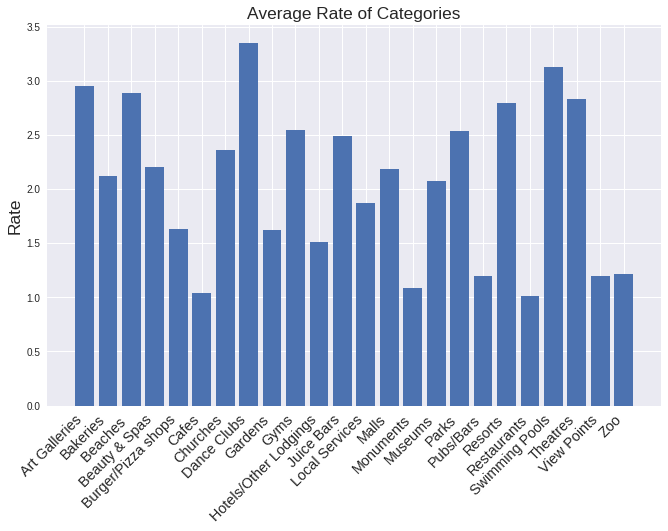

In [4]:
ave_rate_categories = []
for category in dataset['Average Ratings On'].columns:
    ave = ave_without_0(dataset['Average Ratings On'][category].dropna())
    ave_rate_categories.append(round(ave, 3))

plt.figure(figsize=(11,7))
plt.title('Average Rate of Categories', fontsize='xx-large')
plt.bar(x=range(len(ave_rate_categories)), height=ave_rate_categories)
plt.xticks(np.arange(len(ave_rate_categories)), dataset['Average Ratings On'].columns, rotation=45, horizontalalignment='right', fontsize='x-large')
plt.ylabel('Rate', fontsize='xx-large')
# there is attribute 'ha' alias for horizontalalignment
# to separate the plotting and setting use 'ax = plt.gca()' 'ax.xticks(...)'

- ### Then if there are some relationship among the categories
    - The ones with higher correlation coefficiences are annotated

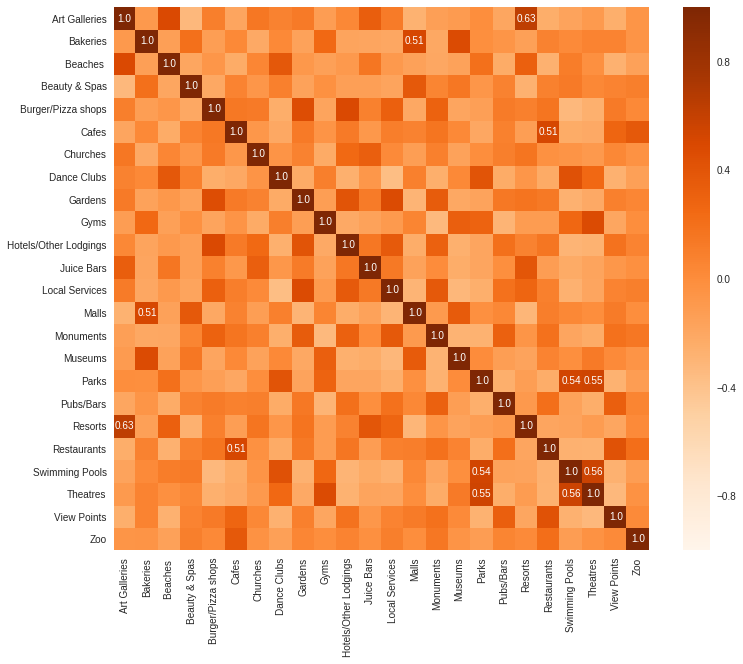

In [5]:
corr = dataset['Average Ratings On'].corr()
annotation = corr.copy().values.astype(str)
for i, arr in enumerate(annotation):
    for j, value in enumerate(arr):
        if float(value) > 0.5 or float(value) < -0.5:
            annotation[i][j] = str(round(float(value), 2))
        else:
            annotation[i][j] = ''
            
plt.figure(figsize=(12,10))
fig = sns.heatmap(corr, annot=annotation, fmt='', cmap='Oranges')

# Clustering
### K-mean

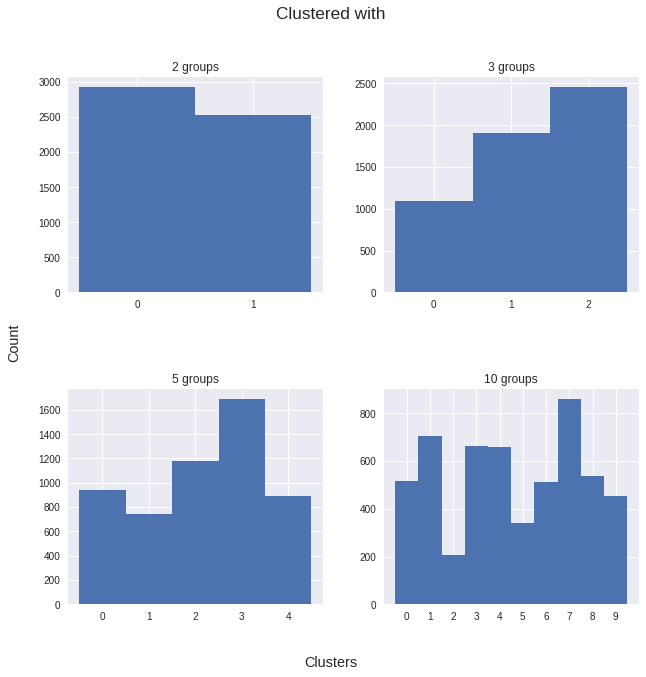

In [6]:
from sklearn.cluster import KMeans

clusters = [2, 3, 5, 10]
    
row = 2      # rows of subplot
column = 2   # columns of subplot

cluster_index = 0;
all_labels_kmean = [];
fig, axes = plt.subplots(row, column)
for i, ax in enumerate(axes.ravel()):
    c = clusters[cluster_index]
    cluster_index = cluster_index + 1
    
    categories = KMeans(n_clusters = c).fit(dataset.dropna().values)
    labels = categories.labels_
    all_labels_kmean.append( labels )
    
    ax.set_title(str(c) + ' groups')
    ax.hist(labels, bins=range(c+1))
    
    ax.set_xticks(np.array(range(c)) + 0.5)
    ax.set_xticklabels(range(c))
    
plt.tight_layout()
fig.text(0.5, 1, 'Clustered with', ha='center', fontsize='xx-large')
fig.text(0.5, 0, 'Clusters', ha='center', fontsize='x-large')
fig.text(0, 0.5, 'Count', va='center', rotation='vertical', fontsize='x-large')
fig.set_figheight(9)
fig.set_figwidth(9)

### Visualizing K-mean result
- Since the dataset is of multidimensional model, there is no way to simply draw a the scatter plot on a 2D figure.<br>
    The most directive and the first idea that come to my mind is that we use the correlation coefficiences among all the attributes to judge the performance.
- The **more proper** the classification is, the more groups with many **higher absolute value of correlation coefficiences** (squares with deeper or lighter color) there will be in.
    - 簡單說，如果對人們採用了越合適的分類，同一行之中就會有越多顏色反差明顯（代表相關係數的絕對值越大，越相關）的群/類別。
- Here, each row represents different number of clusters used to classify.
    - Respectively, there are 2, 3, 5, 10 groups.

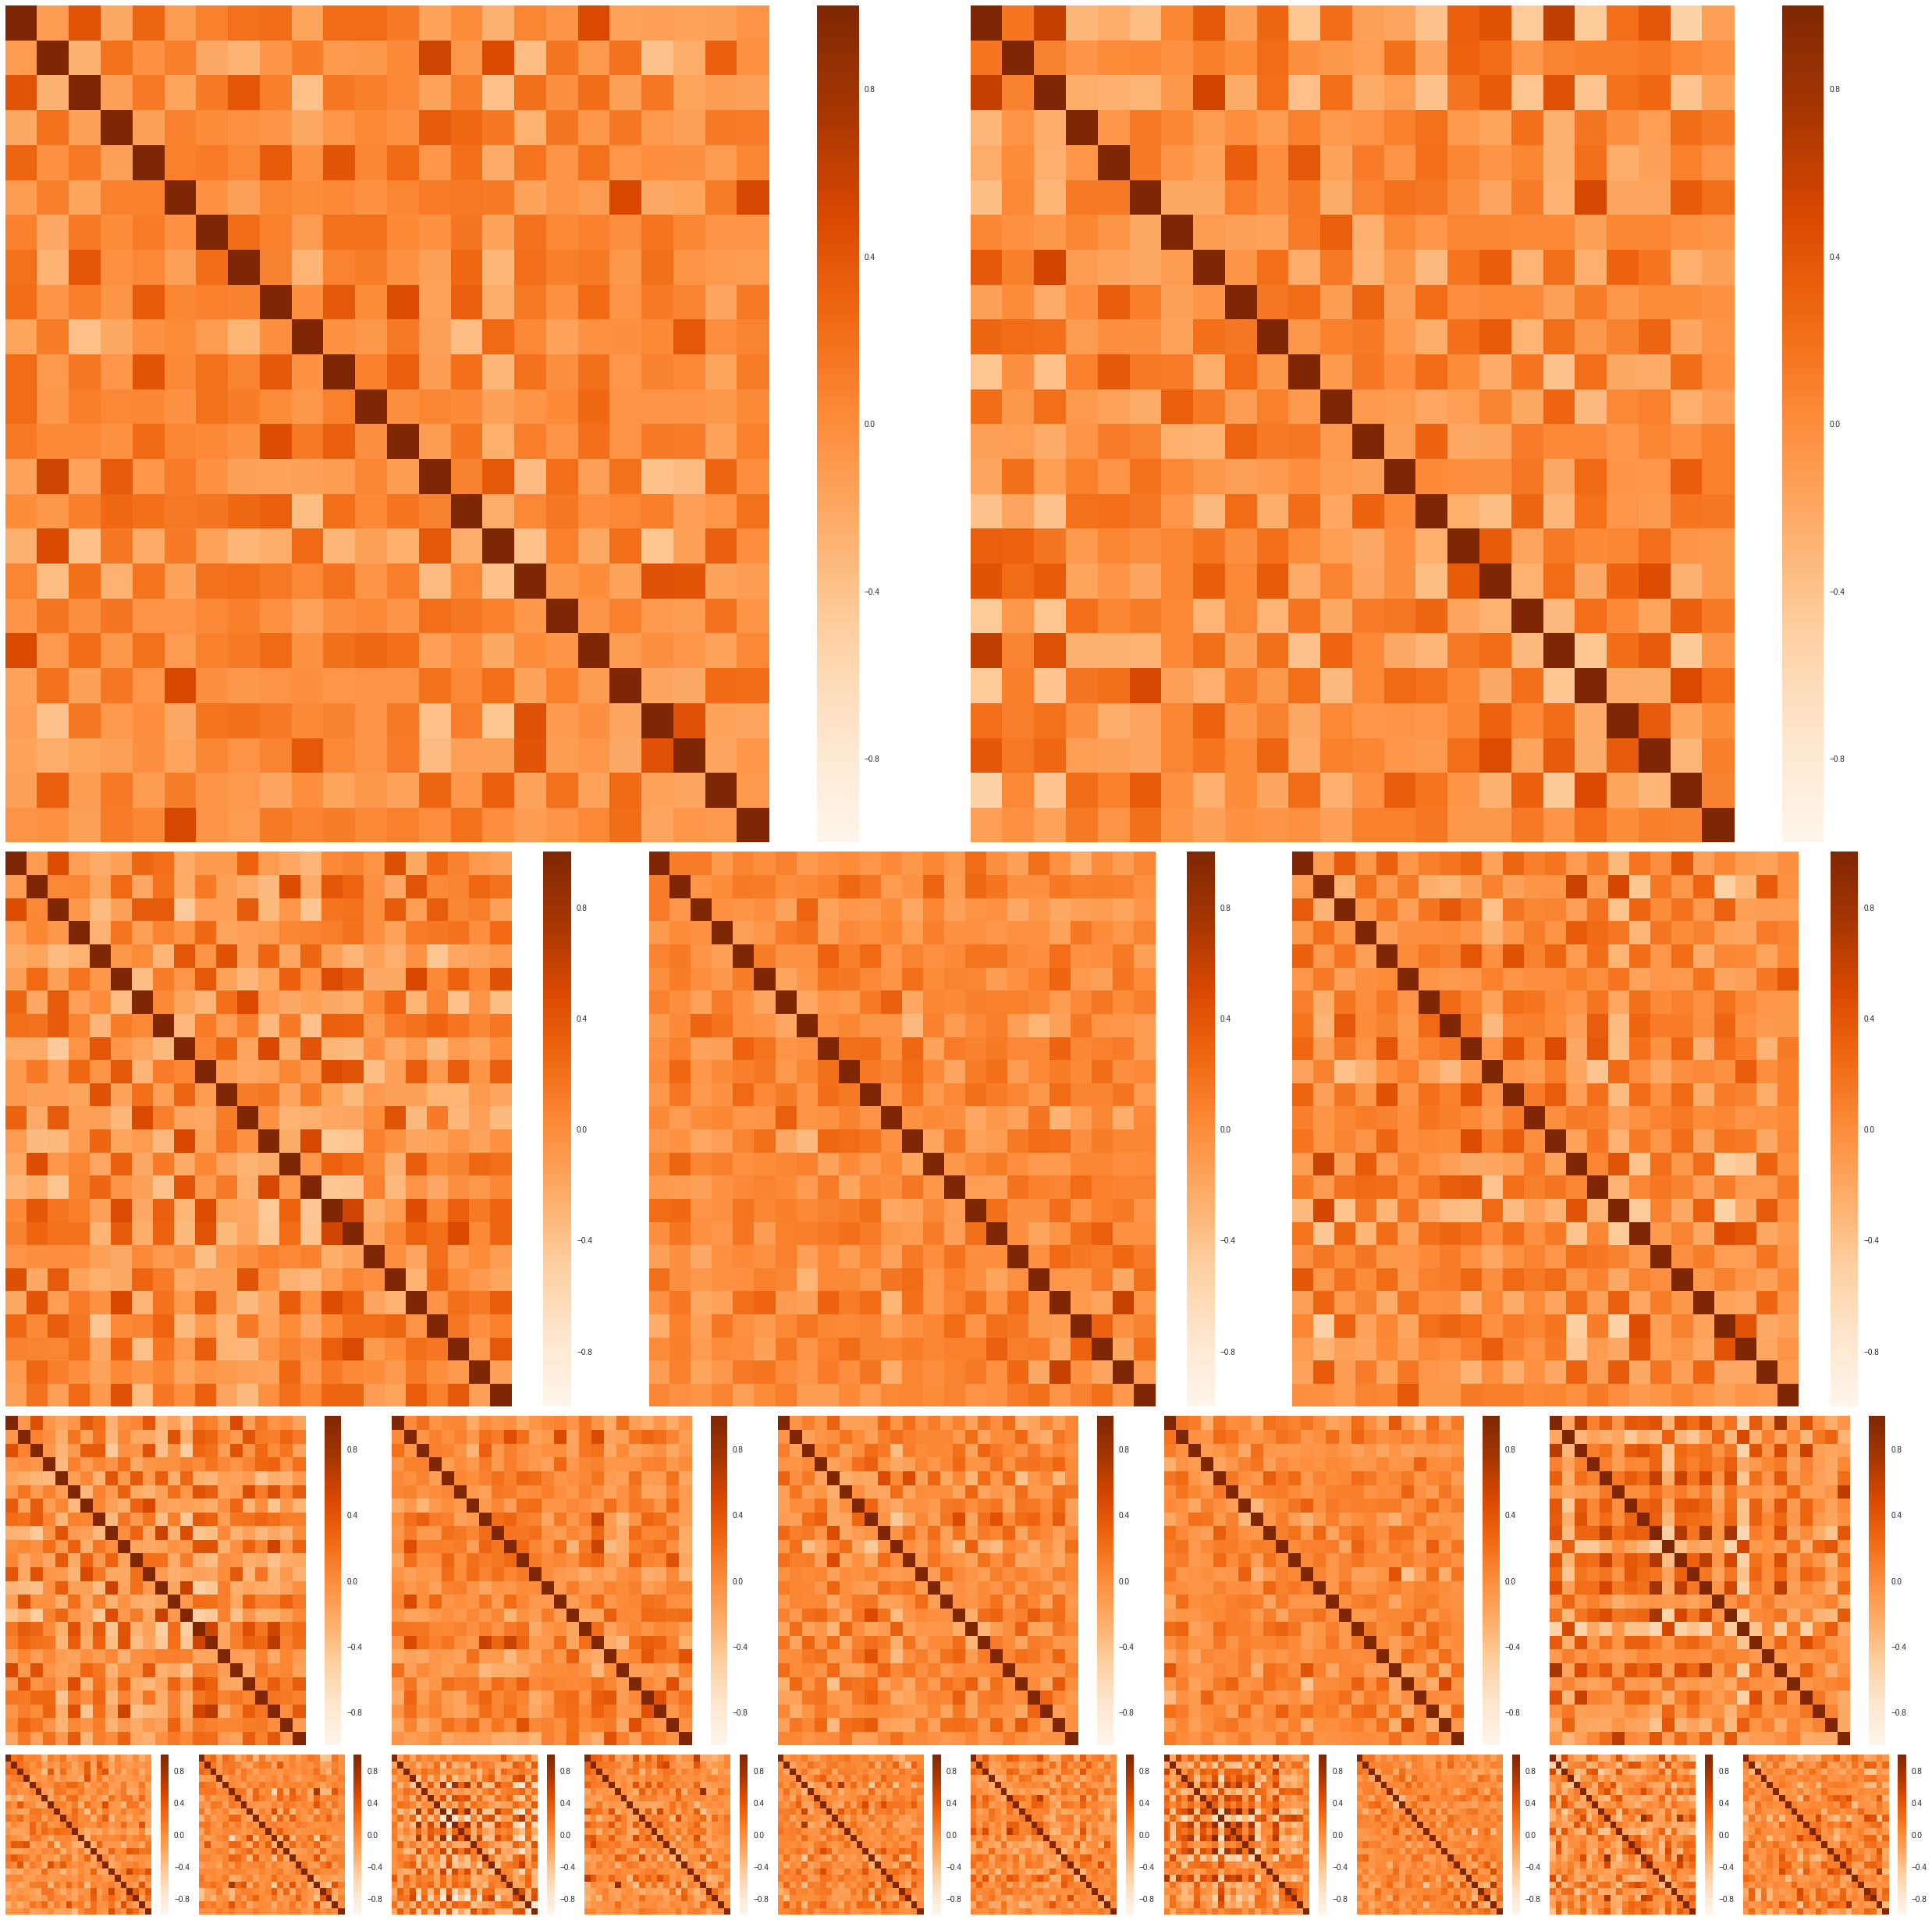

In [7]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(50,45))
# Least Common Multiple of clusters: for spacing the figures
lcm = 30
# clusters rating: 1/2 : 1/3 : 1/5 : 1/10 = 
spans = [15, 10, 6, 3]
gridspec.GridSpec(34,34)

for i, labels in enumerate(all_labels_kmean):
#     plt.title('group ' + str(c+1) + ' in ' + str(clusters[i]) + ' clusters')
#     plt.subplot(len(all_labels), 1, i+1)
    for c in range(clusters[i]):
        corr = dataset['Average Ratings On'].iloc[labels==c].corr()

#         plt.subplot(len(all_labels), clusters[i], i*clusters[i]+c+1)
        plt.subplot2grid((34,34), (sum(spans[:i]), spans[i]*c), colspan=int(lcm/clusters[i]), rowspan=int(lcm/clusters[i]))
        sns.heatmap(corr, fmt='', cmap='Oranges', xticklabels=False, yticklabels=False)

### DBSCAN
- Through some experiments:
    - the **smaller the eps** is set, the **less clusters** there will be; however, the **less useful points**(not considered as noisy) are chosen
    - the **min_samples** doesn't affect the result
    

	eps = 1
number of clusters: 176
noisy points: 3705 / 5454


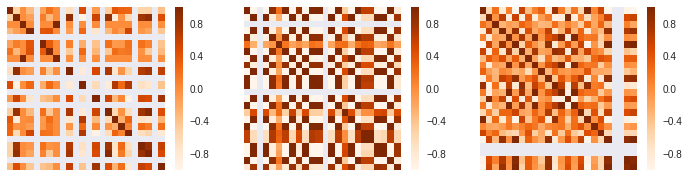

	eps = 0.5
number of clusters: 76
noisy points: 4857 / 5454


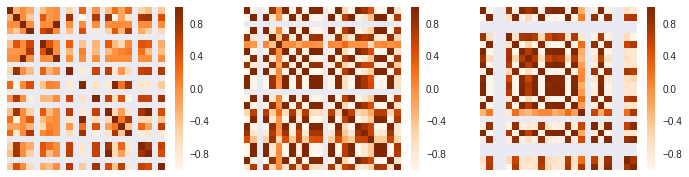

	eps = 0.2
number of clusters: 32
noisy points: 5220 / 5454


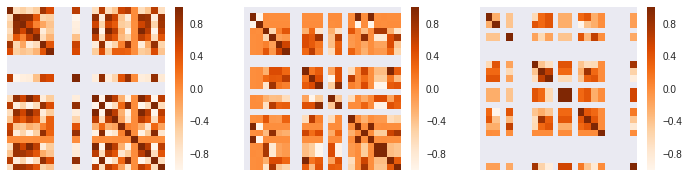

	eps = 0.1
number of clusters: 13
noisy points: 5368 / 5454


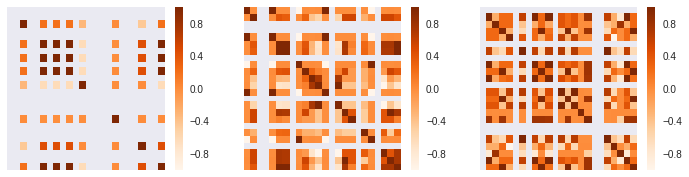

	eps = 0.05
number of clusters: 6
noisy points: 5417 / 5454


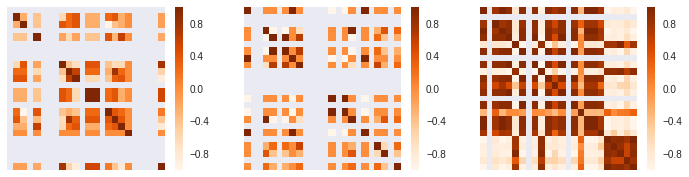

In [8]:
from sklearn.cluster import DBSCAN

eps = [1, 0.5, 0.2, 0.1, 0.05]

# number of groups to be shown 
groups_to_show = [1, 2, 6]

# default is eps = 0.5, min_samples = 5
# where
#     eps: The maximum distance between two points for one to be considered as in the neighborhood of the other.
#     min_samples: The number of points in a neighborhood for a point to be considered as a core point.
for i, e in enumerate(eps):
    fig = plt.figure(figsize=(12, 3))
    print('\teps = ' + str(e))
    categories = DBSCAN(eps = e).fit_predict(dataset.dropna().values)
    #     labels = categories.labels
    #     print(min(labels)+','+max(labels))
    print('number of clusters: '+str(max(categories)))
    labels, counts = np.unique(categories, return_counts=True)
    labels_count = dict(zip(labels, counts))
    print('noisy points: '+str(labels_count[-1])+' / '+str(dataset.dropna().shape[0]))
    
    for j, cluster in enumerate(groups_to_show):
        corr = dataset['Average Ratings On'].iloc[categories==cluster, :].dropna().corr()
        plt.subplot(1, len(groups_to_show), j + 1)
        sns.heatmap(corr, fmt='', cmap='Oranges', annot=True, xticklabels=False, yticklabels=False)
        
    plt.show()
    

# Discussion & Improvement
- In the two methods above, we can see that
    - In K-mean, though the **more groups** there are, the **more clear the difference** in the most clear group would appear, there are still quite a few groups whose elements are barely related, which makes them more like noise.
    - In DBSCAN, due to the density-based oriented design, apparently, the samples are classified in a more specific way that in some groups more than half attributes are even not taken into consideration.<br>
        Also, in comparison to k-mean, the attributes in each group are more related with more clear differences of the colors.
        - However, most of the samples are considered as noise
        
- One possible reason is that maybe categories of each type are not rated in the same scale, standard, or number of people, or even kinds of people
    - To solve it, I decided to normalize the dataset, and then give it a second try.

### Normalizing dataset

In [9]:
normalized_dataset = (dataset - dataset.mean())/(dataset.max() - dataset.min())
normalized_dataset.tail(10)

Average Ratings On                                    \
            Art Galleries  Bakeries  Beaches  Beauty & Spas   
UserId                                                        
5447            -0.056428 -0.176244 -0.144856      0.558685   
5448            -0.056428 -0.180972 -0.144856      0.558685   
5449            -0.053851 -0.185700 -0.052311      0.558685   
5450            -0.051273 -0.190428 -0.142285      0.558685   
5451            -0.051273 -0.195156 -0.083159     -0.175315   
5452            -0.048696 -0.197520 -0.083159      0.558685   
5453            -0.046119 -0.202249 -0.083159     -0.263315   
5454            -0.046119 -0.247166 -0.083159     -0.267315   
5455            -0.043541 -0.251894 -0.116578      0.558685   
5456            -0.040964 -0.263714 -0.083159     -0.271315   

                                                                               \
       Burger/Pizza shops     Cafes  Churches Dance Clubs   Gardens      Gyms   
UserId                                                                          
5447            -0.118151 -0.053841  0.310059   -0.232318  0.693709 -0.338856   
5448             0.687849 -0.053841  0.312059   -0.232318  0.693709 -0.343595   
5449            -0.110151 -0.055841  0.536059   -0.232318  0.693709 -0.348334   
5450             0.005849 -0.057841  0.322059   -0.234896  0.693709 -0.353074   
5451             0.687849 -0.057841  0.324059   -0.234896  0.693709 -0.357813   
5452            -0.000151 -0.059841  0.536059   -0.237473  0.693709 -0.362552   
5453            -0.094151 -0.061841  0.536059   -0.407576  0.693709 -0.364922   
5454            -0.090151 -0.063841  0.536059   -0.412731  0.693709 -0.369661   
5455            -0.088151 -0.063841  0.346059   -0.410153  0.693709 -0.374401   
5456            -0.078151 -0.065841  0.350059   -0.240050  0.693709 -0.379140   

        ...                                                      \
        ...   Museums     Parks Pubs/Bars   Resorts Restaurants   
UserId  ...                                                       
5447    ... -0.222355 -0.328695  0.799986 -0.011244   -0.026483   
5448    ... -0.227095 -0.333525  0.799986 -0.008846   -0.026483   
5449    ... -0.217616 -0.338356  0.799986 -0.006447   -0.028483   
5450    ... -0.219986 -0.340772  0.799986 -0.006447   -0.030483   
5451    ... -0.236573 -0.345603  0.799986 -0.004049   -0.030483   
5452    ... -0.241313 -0.350434  0.799986 -0.001651   -0.032483   
5453    ... -0.246052 -0.355265  0.123986 -0.001651   -0.034483   
5454    ... -0.255531 -0.360096  0.799986  0.000747   -0.036483   
5455    ... -0.260270 -0.364926  0.799986  0.003145   -0.036483   
5456    ... -0.265009 -0.367342  0.799986  0.005543   -0.038483   

                                                      Avg Rate  
       Swimming Pools  Theatres View Points      Zoo            
UserId                                                          
5447         0.450476 -0.406379    0.806038 -0.09856  0.226079  
5448         0.450476 -0.411153   -0.041962 -0.10056  0.294361  
5449        -0.479812 -0.413539   -0.043962 -0.10256  0.146784  
5450        -0.321158 -0.418312   -0.043962 -0.10456  0.072995  
5451        -0.323562 -0.423086    0.124038 -0.10456  0.071894  
5452        -0.325966 -0.427859   -0.055962 -0.10656  0.077951  
5453        -0.328370 -0.432632    0.124038 -0.10856 -0.101014  
5454        -0.330774 -0.437406   -0.045962 -0.10856 -0.050353  
5455        -0.333178 -0.442179   -0.043962 -0.11056  0.018480  
5456        -0.333178 -0.446952   -0.037962 -0.11056 -0.037688  

[10 rows x 25 columns]

### K-Mean with Normalized Dataset

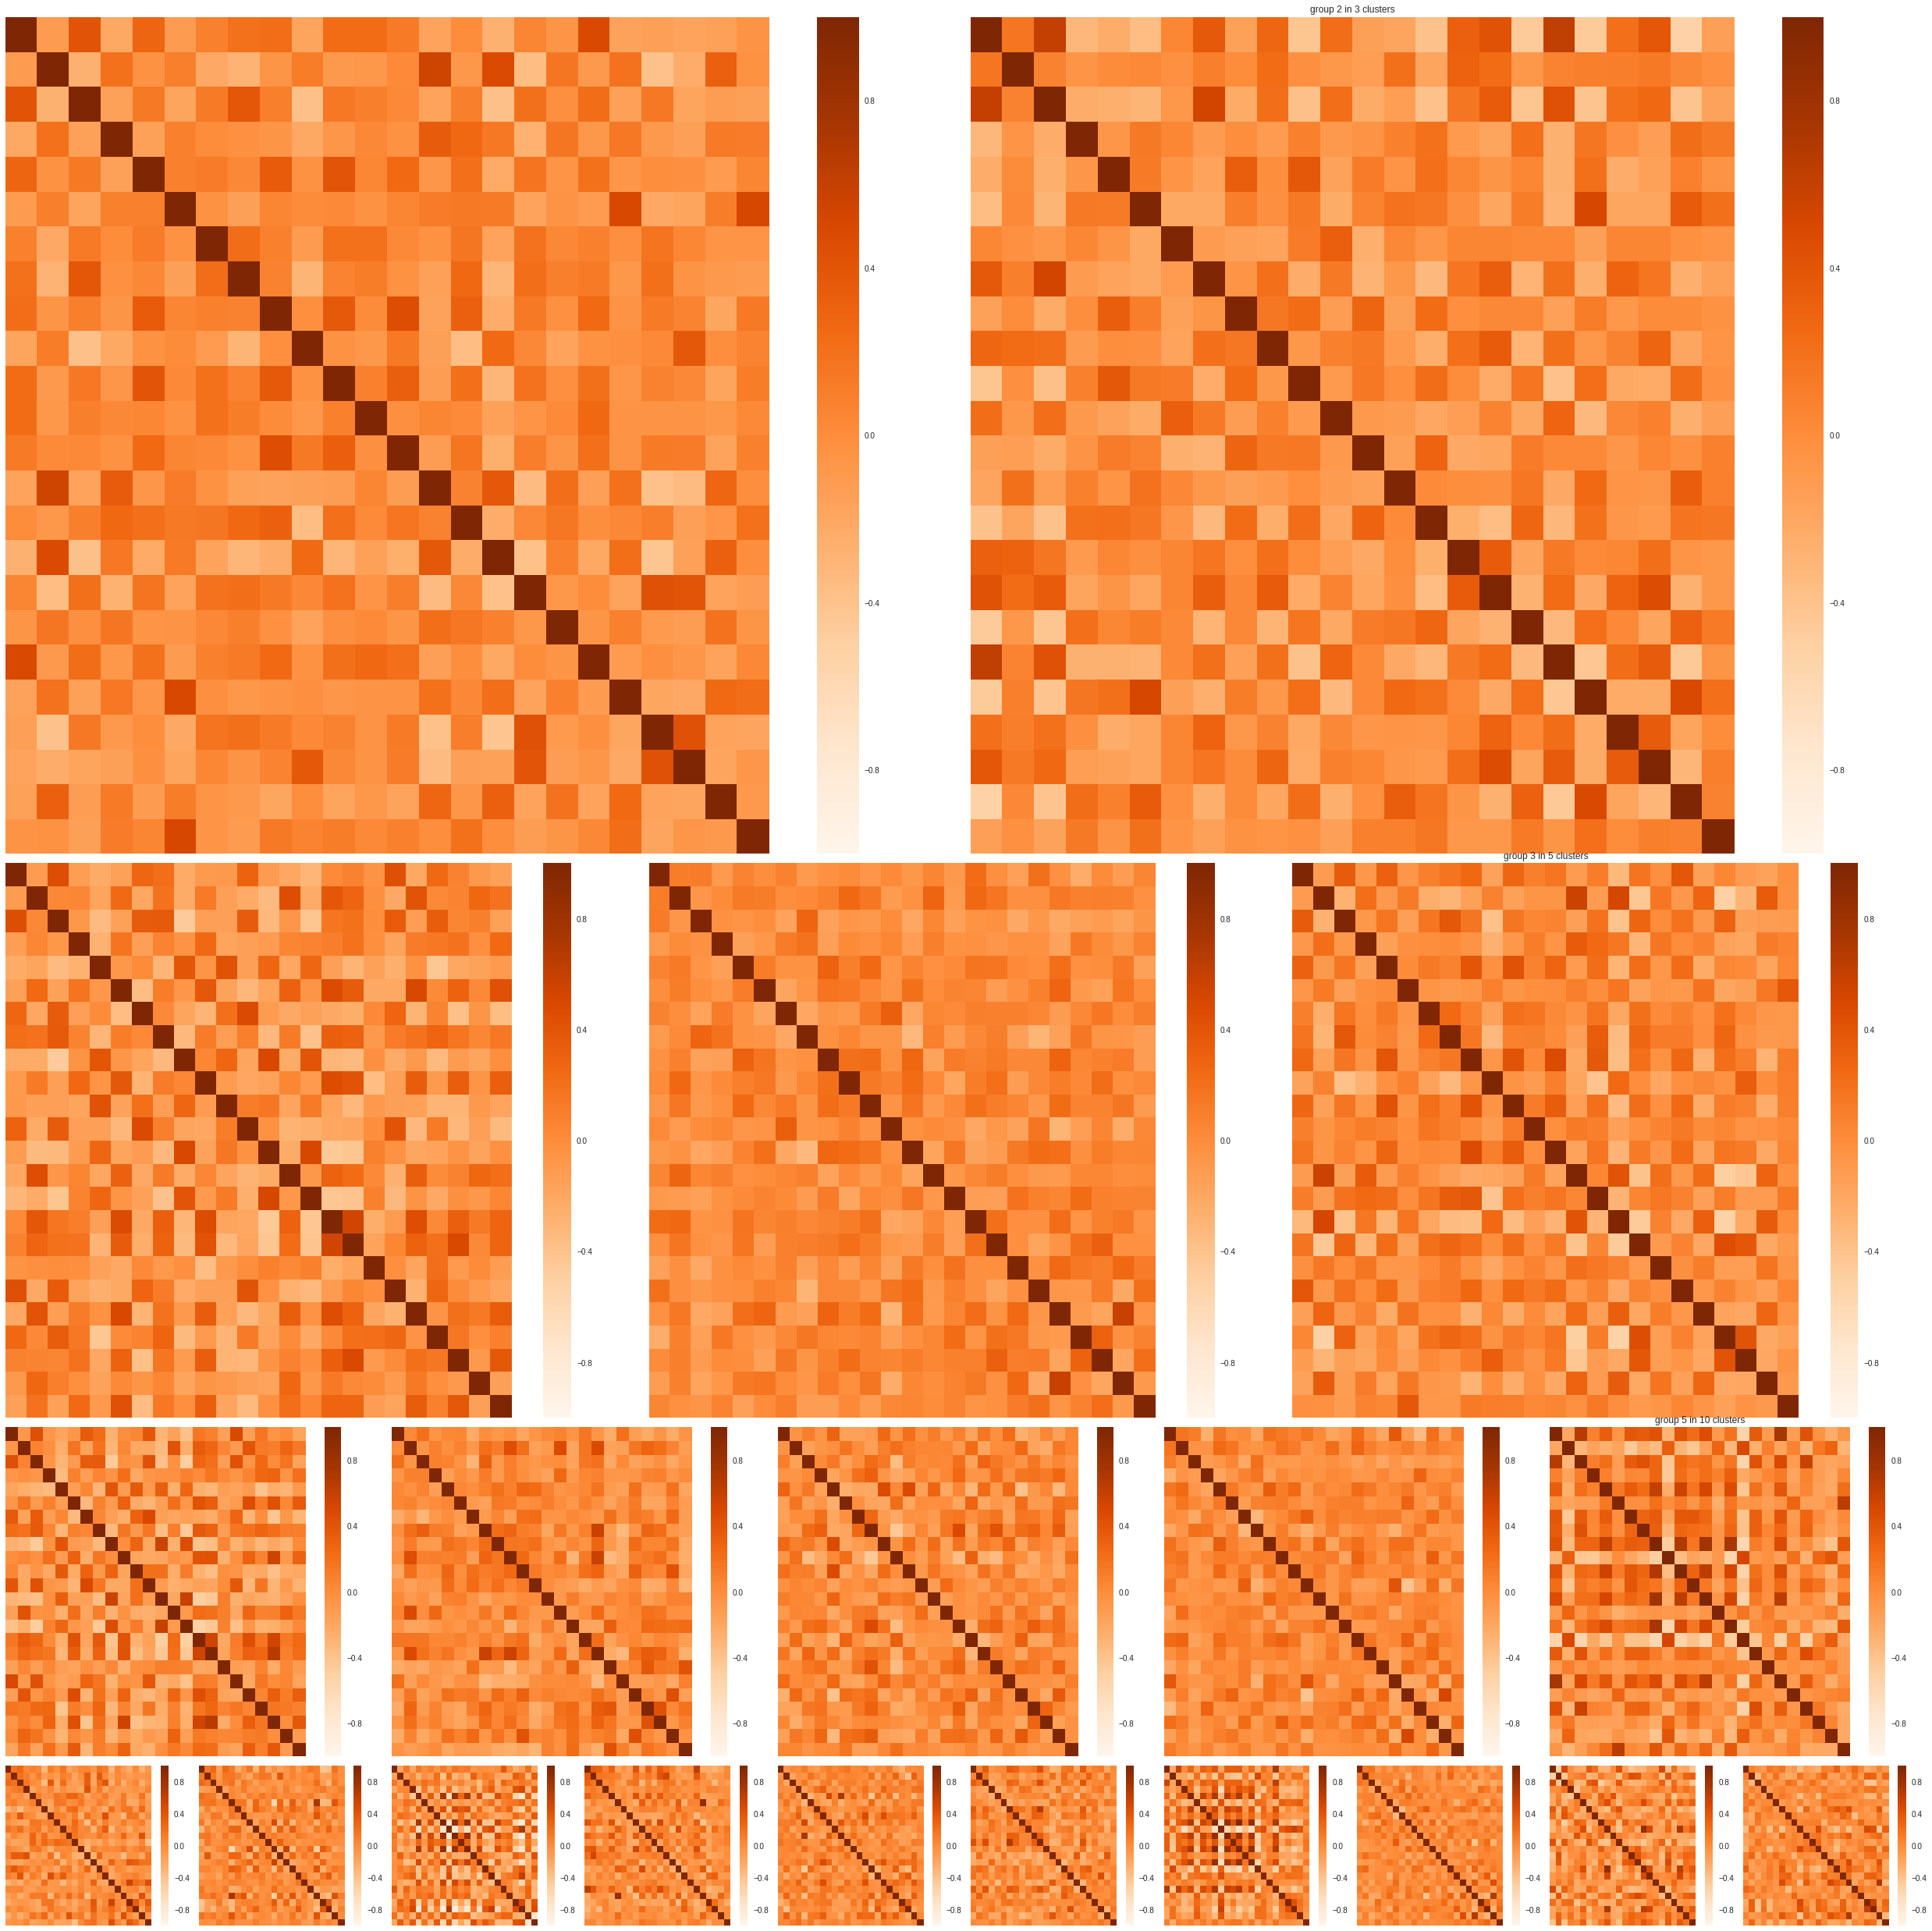

In [10]:
fig = plt.figure(figsize=(50,45))
# Least Common Multiple of clusters: for spacing the figures
lcm = 30
# clusters rating: 1/2 : 1/3 : 1/5 : 1/10 = 
spans = [15, 10, 6, 3]
gridspec.GridSpec(34,34)

for i, labels in enumerate(all_labels_kmean):
    plt.title('group ' + str(c+1) + ' in ' + str(clusters[i]) + ' clusters')
    for c in range(clusters[i]):
        corr = normalized_dataset['Average Ratings On'].iloc[labels==c].corr()

        plt.subplot2grid((34,34), (sum(spans[:i]), spans[i]*c), colspan=int(lcm/clusters[i]), rowspan=int(lcm/clusters[i]))
        sns.heatmap(corr, fmt='', cmap='Oranges', xticklabels=False, yticklabels=False)


### DBSCAN with Normalized Dataset

In [11]:
eps2 = [0.8, 0.5, 0.2, 0.1]
references = [3, 5, 10, 20]
all_labels_dbscan = []

for i, e in enumerate(eps2):
    print('eps = ' + str(e))
    for j, n in enumerate(references):
        print('\tmin_samples = '+str(n))
        categories = DBSCAN(eps = e, min_samples=n).fit_predict(normalized_dataset.dropna().values)
        all_labels_dbscan.append(categories)
        print('\t\tnumber of clusters: '+str(max(categories)))
        labels, counts = np.unique(categories, return_counts=True)
        labels_count = dict(zip(labels, counts))
        print('\t\tnoisy points: '+str(labels_count[-1])+' / '+str(normalized_dataset.dropna().shape[0]))
    print()

eps = 0.8
	min_samples = 3
		number of clusters: 48
		noisy points: 319 / 5454
	min_samples = 5
		number of clusters: 17
		noisy points: 473 / 5454
	min_samples = 10
		number of clusters: 7
		noisy points: 849 / 5454
	min_samples = 20
		number of clusters: 10
		noisy points: 1327 / 5454

eps = 0.5
	min_samples = 3
		number of clusters: 358
		noisy points: 1310 / 5454
	min_samples = 5
		number of clusters: 202
		noisy points: 1898 / 5454
	min_samples = 10
		number of clusters: 88
		noisy points: 2834 / 5454
	min_samples = 20
		number of clusters: 27
		noisy points: 3892 / 5454

eps = 0.2
	min_samples = 3
		number of clusters: 391
		noisy points: 3092 / 5454
	min_samples = 5
		number of clusters: 159
		noisy points: 3925 / 5454
	min_samples = 10
		number of clusters: 37
		noisy points: 4814 / 5454
	min_samples = 20
		number of clusters: 6
		noisy points: 5240 / 5454

eps = 0.1
	min_samples = 3
		number of clusters: 233
		noisy points: 4366 / 5454
	min_samples = 5
		number of clusters: 73

# Discussion
- In K-Mean, there is no much difference between the original and the normalized one. Probably, it is because K-Mean is not suitable for this dataset for the algorithm is oriented for linear-sparable models, and in this model, the samples construct a much more complicated system in a more random way, even DBScan need to discard most of the samples to produce a more desirable output.
- In DBSCAN, there is much more different between the two:
    - First, the much more samples in the dataset is considered as useful data instead of useless noise
    - Further, the parameter **min_sample** mentioned before now matters.
    - Here, I adjust eps options as response to the range of the values of data becoming a lot smaller now.<br>
        Also, I picked only a few visualized out of the ones listed above and one cluster for each(here cluster 5 is chosen), and move them to the below in order to keep the output from too long.

eps = 0.8


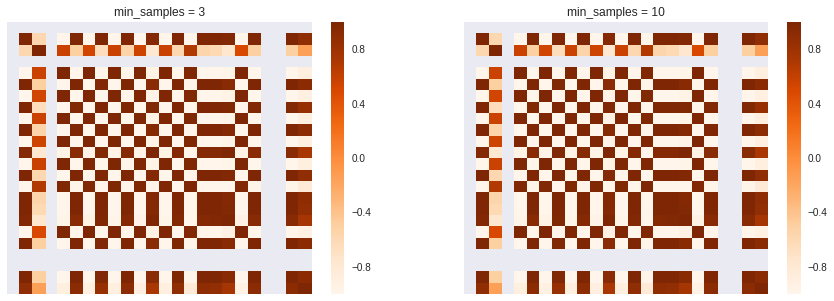

eps = 0.5


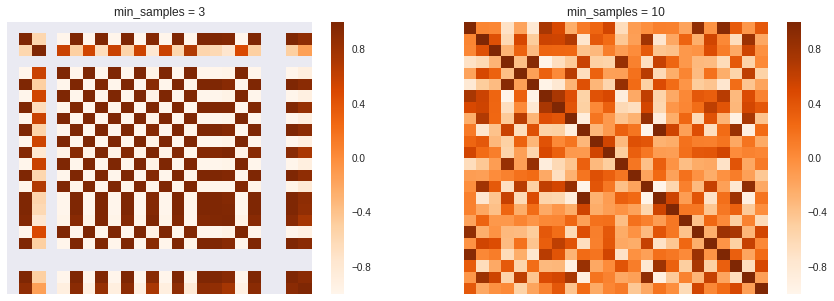

eps = 0.2


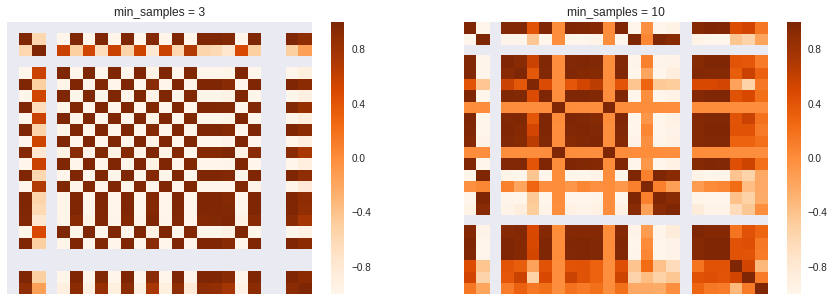

eps = 0.1


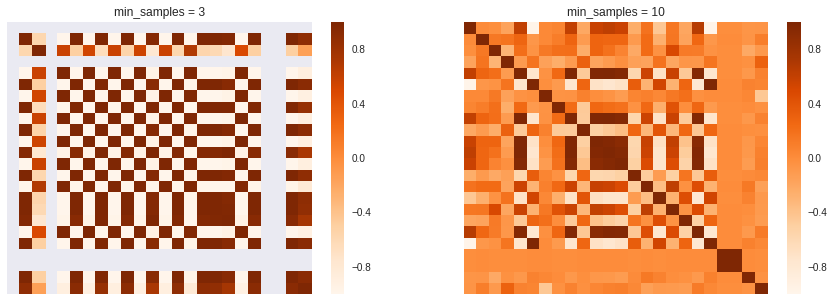

In [13]:
plot_each_row = 2
row = 4

for i in range(row):
    print('eps = ' + str(eps2[i]))
    fig = plt.figure(figsize=(15, 5))
    for j in range(plot_each_row):
        corr = normalized_dataset['Average Ratings On'].iloc[all_labels_dbscan[i*j*2]==5, :].dropna().corr()
                                                             
        plt.subplot(1, 2, j+1)
        plt.title('min_samples = '+str(references[j*2]))
        sns.heatmap(corr, fmt='', cmap='Oranges', xticklabels=False, yticklabels=False)
    plt.show()